In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import time
import datetime
import calendar
import matplotlib as mpl


In [2]:
uber_data_4 = pd.read_csv('../uber/data_files/uber-raw-data-apr14.csv')
#uber_data_4
uber_data_5 = pd.read_csv('../uber/data_files/uber-raw-data-may14.csv')
#uber_data_5
uber_data_6 = pd.read_csv('../uber/data_files/uber-raw-data-jun14.csv')
#uber_data_6
uber_data_7= pd.read_csv('../uber/data_files/uber-raw-data-jul14.csv')
#uber_data_7
uber_data_8 = pd.read_csv('../uber/data_files/uber-raw-data-aug14.csv')
#uber_data_8
uber_data_9 = pd.read_csv('../uber/data_files/uber-raw-data-sep14.csv')
#uber_data_9
amer_data = pd.read_csv('../uber/data_files/other-American_B01362.csv')
#amer_data
dial_data = pd.read_csv('../uber/data_files/other-Dial7_B00887.csv')
#dial_data
lyft_data = pd.read_csv('../uber/data_files/other-Lyft_B02510.csv')
#lyft_data
skyline_data = pd.read_csv('../uber/data_files/other-Skyline_B00111.csv')
#skyline_data
fed_data = pd.read_csv('../uber/data_files/other-Federal_02216.csv')
fed_data

dial_data.rename(columns={'Date': 'Date/Time'}, inplace=True)
lyft_data.rename(columns={'time_of_trip': 'Date/Time'}, inplace=True)
skyline_data.rename(columns={'Date': 'Date/Time'}, inplace=True)
amer_data.rename(columns={'DATE': 'Date/Time'}, inplace=True)
fed_data.rename(columns={'Date': 'Date/Time'}, inplace=True)


In [3]:
uber_data_4 = pd.DataFrame(pd.to_datetime(uber_data_4['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_5 = pd.DataFrame(pd.to_datetime(uber_data_5['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_6 = pd.DataFrame(pd.to_datetime(uber_data_6['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_7 = pd.DataFrame(pd.to_datetime(uber_data_7['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_8 = pd.DataFrame(pd.to_datetime(uber_data_8['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
uber_data_9 = pd.DataFrame(pd.to_datetime(uber_data_9['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)

dial_data = pd.DataFrame(pd.to_datetime(dial_data['Date/Time'],format = '%Y/%m/%d').dt.date)
lyft_data = pd.DataFrame(pd.to_datetime(lyft_data['Date/Time'],format = '%m/%d/%Y %H:%M').dt.date)
skyline_data = pd.DataFrame(pd.to_datetime(skyline_data['Date/Time'],format = '%m/%d/%Y').dt.date)
amer_data = pd.DataFrame(pd.to_datetime(amer_data['Date/Time'],format = '%m/%d/%Y').dt.date)                        
fed_data = pd.DataFrame(pd.to_datetime(fed_data['Date/Time'],format = '%m/%d/%Y').dt.date)

fed_data

,Date/Time
0,2014-07-01
1,2014-07-01
2,2014-07-01
3,2014-07-01
4,2014-07-01
...,...
271,2014-09-25
272,2014-09-26
273,2014-09-27
274,2014-09-27


In [4]:
uber_data_4['service'] = 'uber'
uber_data_5['service'] = 'uber'
uber_data_6['service'] = 'uber'
uber_data_7['service'] = 'uber'
uber_data_8['service'] = 'uber'
uber_data_9['service'] = 'uber'
dial_data['service'] = 'Dial'
lyft_data['service'] = 'Lyft'
skyline_data['service'] = 'Skyline'
amer_data['service'] = 'American'
fed_data['service'] = 'Federal'

all_data = pd.DataFrame()
all_data = all_data.append(uber_data_4)
all_data = all_data.append(uber_data_5)
all_data = all_data.append(uber_data_6)
all_data = all_data.append(uber_data_7)
all_data = all_data.append(uber_data_8)
all_data = all_data.append(uber_data_9)
all_data = all_data.append(dial_data)
all_data = all_data.append(lyft_data)
all_data = all_data.append(skyline_data)
all_data = all_data.append(amer_data)
all_data = all_data.append(fed_data)

all_data.sort_values('Date/Time', inplace = True, ascending = True)

all_data['Date/Time'] = pd.to_datetime(all_data['Date/Time'])
all_data['month'] = all_data['Date/Time'].dt.month
all_data

,Date/Time,service,month
0,2014-04-01,uber,4
328536,2014-04-01,uber,4
328537,2014-04-01,uber,4
328538,2014-04-01,uber,4
328539,2014-04-01,uber,4
...,...,...,...
56231,2014-09-30,Dial,9
646443,2014-09-30,uber,9
646442,2014-09-30,uber,9
646448,2014-09-30,uber,9


Text(0.5, 1.0, 'Uber vs other services between July to September (2014)')

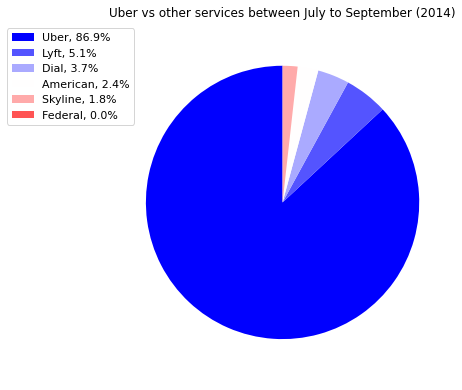

In [8]:
sizes = pd.value_counts(all_data["service"])
labels = 'Uber', 'Lyft', 'Dial', 'American', 'Skyline', 'Federal'

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
    l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title ("Uber vs other services between July to September (2014)")

